<b><h3>Hotelling's T-square Anomaly Detection</h3></b>

In [4]:
hotteling_tsquare = function(train, test, alpha=0.05){
  ## Control Limit
  obs = nrow(train) # row수
  dim = ncol(train) # col수
  
  mu = colMeans(train) 
  
  mu_mat = matrix(mu, nrow(test), ncol(test), byrow=T)
  
  # qf: F-distribution
  CL = qf(1-alpha, dim, obs-dim) * (dim*(obs+1)*(obs-1)/(obs*(obs-dim)))

  # hottelings t-square의 cov 역수
  w = solve(cov(train))
  gap = test - mu_mat
  
  # t-square matrix
  tsq_mat = matrix(0, nrow(test), 1)
  for(i in 1:nrow(test)){
    tsq_mat[i,1] = as.double(gap[i,]) %*% w %*% t(t(as.double(gap[i,])))
  }
  ret = list(tsq_mat = tsq_mat, CL = CL)
  
  return(ret)
}

In [5]:
df = iris[,-5]
train = df[1:100,]
test = df[101:150,]

In [6]:
maha = hotteling_tsquare(train, test, alpha=.05)

In [7]:
tsquare = maha$tsq_mat
cl = maha$CL

In [8]:
outlier = tsquare>cl

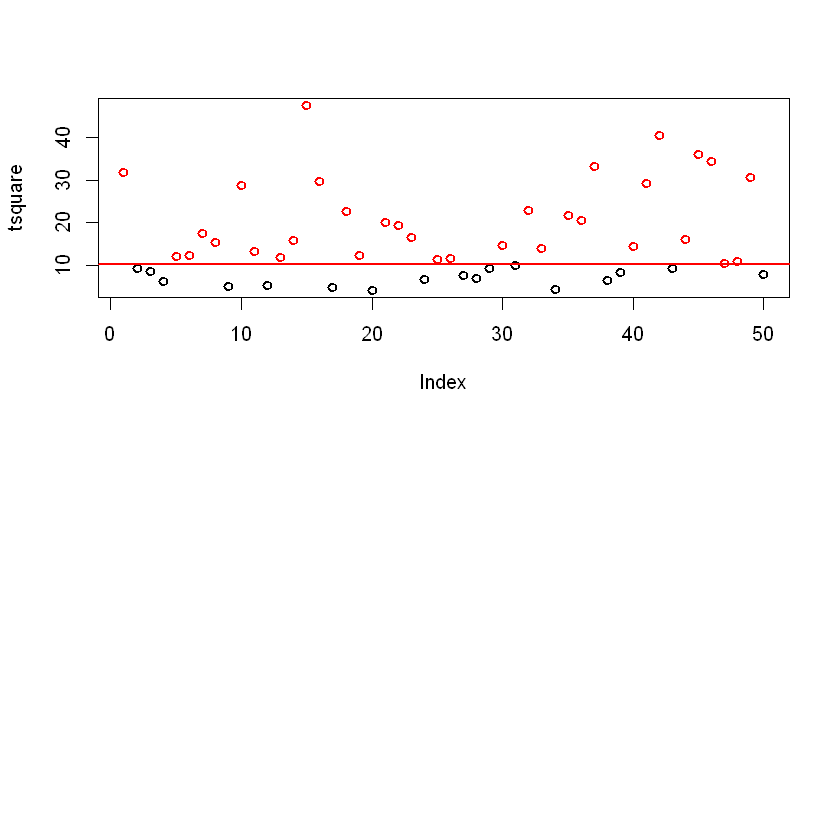

In [13]:
par(mfrow = c(2,1))
plot(tsquare, type='p', lwd=2, col=outlier+1)
abline(h=cl, col='red', lwd=2)